In [2]:
import json
import os
from bertopic import BERTopic
import matplotlib.pyplot as plt
os.chdir("..")
os.chdir("src")
import pandas as pd
from evaluate_bertopic import (
    load_model_outputs,
    word_cloud_bertopic,
    get_bertopic_params,
    coherence_score,
    load_inputs,
    plot_lda_topic_dist,
)
os.chdir("..")

## Get parameters

##### HDBSCAN

In [2]:
model_params_hdbscan = []
topn_list = [5, 6, 7, 8, 9, 10]
for t in topn_list:    
    topic_model = load_model_outputs(
        f"models/bertopic/topn_{t}/hdbscan/best_model",
        load_model_only=True
        )
    params = get_bertopic_params(topic_model)
    params["top_n"] = t
    model_params_hdbscan.append(params)   

In [3]:
model_params_hdbscan

[{'n_components': 4,
  'n_neighbors': 38,
  'min_dist': 0.75,
  'nr_topics': 19,
  'min_cluster_size': 34,
  'max_cluster_size': 31000,
  'min_samples': 5,
  'alpha': 0.8,
  'top_n': 5},
 {'n_components': 5,
  'n_neighbors': 28,
  'min_dist': 0.9,
  'nr_topics': 14,
  'min_cluster_size': 26,
  'max_cluster_size': 46000,
  'min_samples': 10,
  'alpha': 1.1,
  'top_n': 6},
 {'n_components': 11,
  'n_neighbors': 44,
  'min_dist': 0.6000000000000001,
  'nr_topics': 14,
  'min_cluster_size': 18,
  'max_cluster_size': 37000,
  'min_samples': 25,
  'alpha': 1.0,
  'top_n': 7},
 {'n_components': 7,
  'n_neighbors': 34,
  'min_dist': 0.75,
  'nr_topics': 22,
  'min_cluster_size': 22,
  'max_cluster_size': 30000,
  'min_samples': 5,
  'alpha': 1.2000000000000002,
  'top_n': 8},
 {'n_components': 7,
  'n_neighbors': 30,
  'min_dist': 0.6000000000000001,
  'nr_topics': 28,
  'min_cluster_size': 30,
  'max_cluster_size': 39000,
  'min_samples': 19,
  'alpha': 1.7000000000000002,
  'top_n': 9},
 {'n

In [4]:
bertopic_hdbscan_params = pd.DataFrame(model_params_hdbscan)
bertopic_hdbscan_params

,n_components,n_neighbors,min_dist,nr_topics,min_cluster_size,max_cluster_size,min_samples,alpha,top_n
0,4,38,0.75,19,34,31000,5,0.8,5
1,5,28,0.90,14,26,46000,10,1.1,6
2,11,44,0.60,14,18,37000,25,1.0,7
3,7,34,0.75,22,22,30000,5,1.2,8
4,7,30,0.60,28,30,39000,19,1.7,9
5,11,14,0.90,18,24,50000,25,1.3,10


##### K-Means

In [5]:
model_params_kmeans = []
topn_list = [5, 6, 7, 8, 9, 10]
for t in topn_list:    
    topic_model = load_model_outputs(
        f"models/bertopic/topn_{t}/kmeans/best_model",
        load_model_only=True
        )
    params = get_bertopic_params(topic_model)
    params["top_n"] = t
    model_params_kmeans.append(params)

In [6]:
bertopic_kmeans_params = pd.DataFrame(model_params_kmeans)
bertopic_kmeans_params

,n_components,n_neighbors,min_dist,nr_topics,n_clusters,n_init,max_iter,top_n
0,11,16,0.55,30,60,12,310,5
1,13,20,0.35,15,135,7,250,6
2,9,16,0.75,14,100,20,430,7
3,14,24,0.35,23,125,6,320,8
4,13,26,0.35,20,70,16,270,9
5,10,14,0.60,22,100,20,470,10


# Get Metrics

In [7]:
embeddings, vectorizer_model, docs = load_inputs("models/bertopic/inputs")

In [12]:
model_metrics_hdbscan = []
topn_list = [5, 6, 7, 8, 9, 10]

for t in topn_list:    
    topic_model = load_model_outputs(
        f"models/bertopic/topn_{t}/hdbscan/best_model",
        load_model_only=True
    )
    cv = coherence_score(docs, topic_model, vectorizer_model, "c_v")
    nmpi = coherence_score(docs, topic_model, vectorizer_model, "c_npmi")
        
    metrics_hdbscan = {} 
    metrics_hdbscan["top_n"] = t    
    metrics_hdbscan["cv"] = cv
    metrics_hdbscan["nmpi"] = nmpi

    model_metrics_hdbscan.append(metrics_hdbscan)

In [40]:
model_metrics_hdbscan

[{'top_n': 5, 'cv': 0.6327356734284142, 'nmpi': 0.11930927677160402},
 {'top_n': 6, 'cv': 0.6316771281527257, 'nmpi': 0.1270914714155688},
 {'top_n': 7, 'cv': 0.60062913735541, 'nmpi': 0.09028267714656323},
 {'top_n': 8, 'cv': 0.5615257341952135, 'nmpi': 0.05535549019908682},
 {'top_n': 9, 'cv': 0.5216634544913428, 'nmpi': 0.0574837811730553},
 {'top_n': 10, 'cv': 0.5132670650227419, 'nmpi': 0.011059208138140581}]

In [41]:
model_metrics_kmeans = []
topn_list = [5, 6, 7, 8, 9, 10]

for t in topn_list:    
    topic_model = load_model_outputs(
        f"models/bertopic/topn_{t}/kmeans/best_model",
        load_model_only=True
    )
    cv = coherence_score(docs, topic_model, vectorizer_model, "c_v")
    nmpi = coherence_score(docs, topic_model, vectorizer_model, "c_npmi")
        
    metrics_kmeans = {}  
    metrics_kmeans["top_n"] = t    
    metrics_kmeans["cv"] = cv
    metrics_kmeans["nmpi"] = nmpi

    model_metrics_kmeans.append(metrics_kmeans)

In [42]:
model_metrics_kmeans

[{'top_n': 5, 'cv': 0.6262856443569578, 'nmpi': 0.12051673145002068},
 {'top_n': 6, 'cv': 0.6005811213292955, 'nmpi': 0.09878777733344112},
 {'top_n': 7, 'cv': 0.5445290526096022, 'nmpi': 0.05579811680776636},
 {'top_n': 8, 'cv': 0.5501199591311651, 'nmpi': 0.05160519422164456},
 {'top_n': 9, 'cv': 0.5088602081086037, 'nmpi': 0.023268113737725877},
 {'top_n': 10, 'cv': 0.5187617062071619, 'nmpi': 0.03306818258162177}]

## Joining kmeans and hdbscan in the same json

In [43]:
combined_metrics = {
    "hdbscan": model_metrics_hdbscan,
    "kmeans": model_metrics_kmeans
}

with open('models/bertopic/metrics.json', 'w') as file:
    json.dump(combined_metrics, file, indent=4)

In [2]:
# Reading it back
file_path = 'models/bertopic/metrics.json'
with open(file_path, 'r') as file:
    metrics = json.load(file)

In [45]:
metrics

{'hdbscan': [{'top_n': 5,
   'cv': 0.6327356734284142,
   'nmpi': 0.11930927677160402},
  {'top_n': 6, 'cv': 0.6316771281527257, 'nmpi': 0.1270914714155688},
  {'top_n': 7, 'cv': 0.60062913735541, 'nmpi': 0.09028267714656323},
  {'top_n': 8, 'cv': 0.5615257341952135, 'nmpi': 0.05535549019908682},
  {'top_n': 9, 'cv': 0.5216634544913428, 'nmpi': 0.0574837811730553},
  {'top_n': 10, 'cv': 0.5132670650227419, 'nmpi': 0.011059208138140581}],
 'kmeans': [{'top_n': 5,
   'cv': 0.6262856443569578,
   'nmpi': 0.12051673145002068},
  {'top_n': 6, 'cv': 0.6005811213292955, 'nmpi': 0.09878777733344112},
  {'top_n': 7, 'cv': 0.5445290526096022, 'nmpi': 0.05579811680776636},
  {'top_n': 8, 'cv': 0.5501199591311651, 'nmpi': 0.05160519422164456},
  {'top_n': 9, 'cv': 0.5088602081086037, 'nmpi': 0.023268113737725877},
  {'top_n': 10, 'cv': 0.5187617062071619, 'nmpi': 0.03306818258162177}]}

In [3]:
df_metrics_hdbscan = pd.DataFrame(metrics["hdbscan"])
df_metrics_kmeans = pd.DataFrame(metrics["kmeans"])

In [36]:
df_metrics_hdbscan

,top_n,cv,nmpi
0,5,0.632736,0.119309
1,6,0.631677,0.127091
2,7,0.600629,0.090283
3,8,0.561526,0.055355
4,9,0.521663,0.057484
5,10,0.513267,0.011059


In [37]:
df_metrics_kmeans

,top_n,cv,nmpi
0,5,0.632736,0.119309
1,6,0.631677,0.127091
2,7,0.600629,0.090283
3,8,0.561526,0.055355
4,9,0.521663,0.057484
5,10,0.513267,0.011059


# Plot Metrics

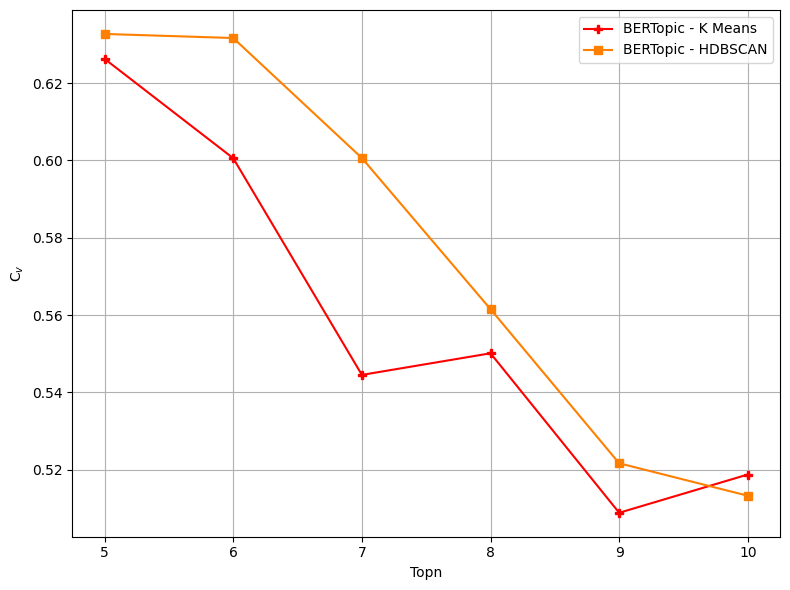

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(df_metrics_kmeans['top_n'], df_metrics_kmeans['cv'], label='BERTopic - K Means', marker='P', color="#ff0000")
plt.plot(df_metrics_hdbscan['top_n'], df_metrics_hdbscan['cv'], label='BERTopic - HDBSCAN', marker='s', color="#ff8000")

plt.ylabel('C$_v$')
plt.xlabel('Topn')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.savefig('/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/bertopic/bertopic_cv.pdf')

plt.show()


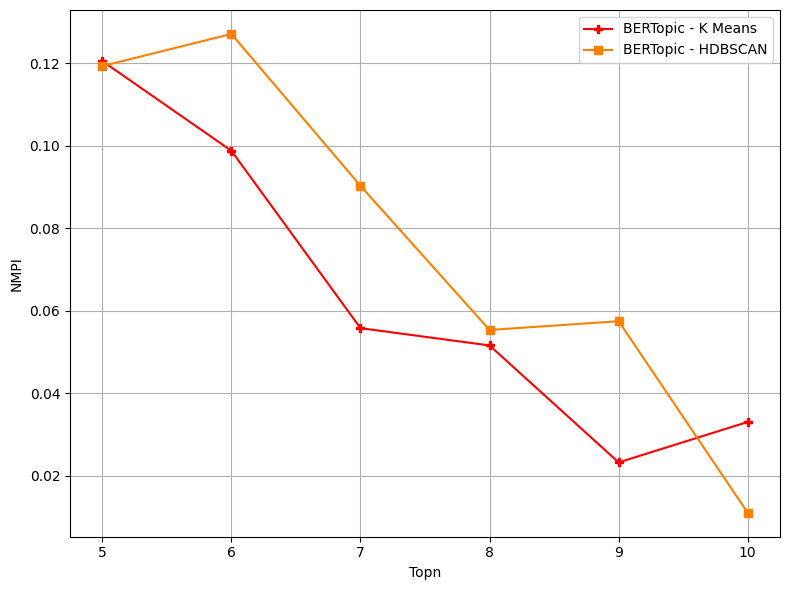

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df_metrics_kmeans['top_n'], df_metrics_kmeans['nmpi'], label='BERTopic - K Means', marker='P', color="#ff0000")
plt.plot(df_metrics_hdbscan['top_n'], df_metrics_hdbscan['nmpi'], label='BERTopic - HDBSCAN', marker='s', color="#ff8000")

plt.ylabel('NMPI')
plt.xlabel('Topn')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.savefig('/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/bertopic/bertopic_nmpi.pdf')

plt.show()


## Plot Distributions

In [17]:
topic_model = load_model_outputs(
    f"models/bertopic/topn_6/hdbscan/best_model",
    load_model_only=True
    )

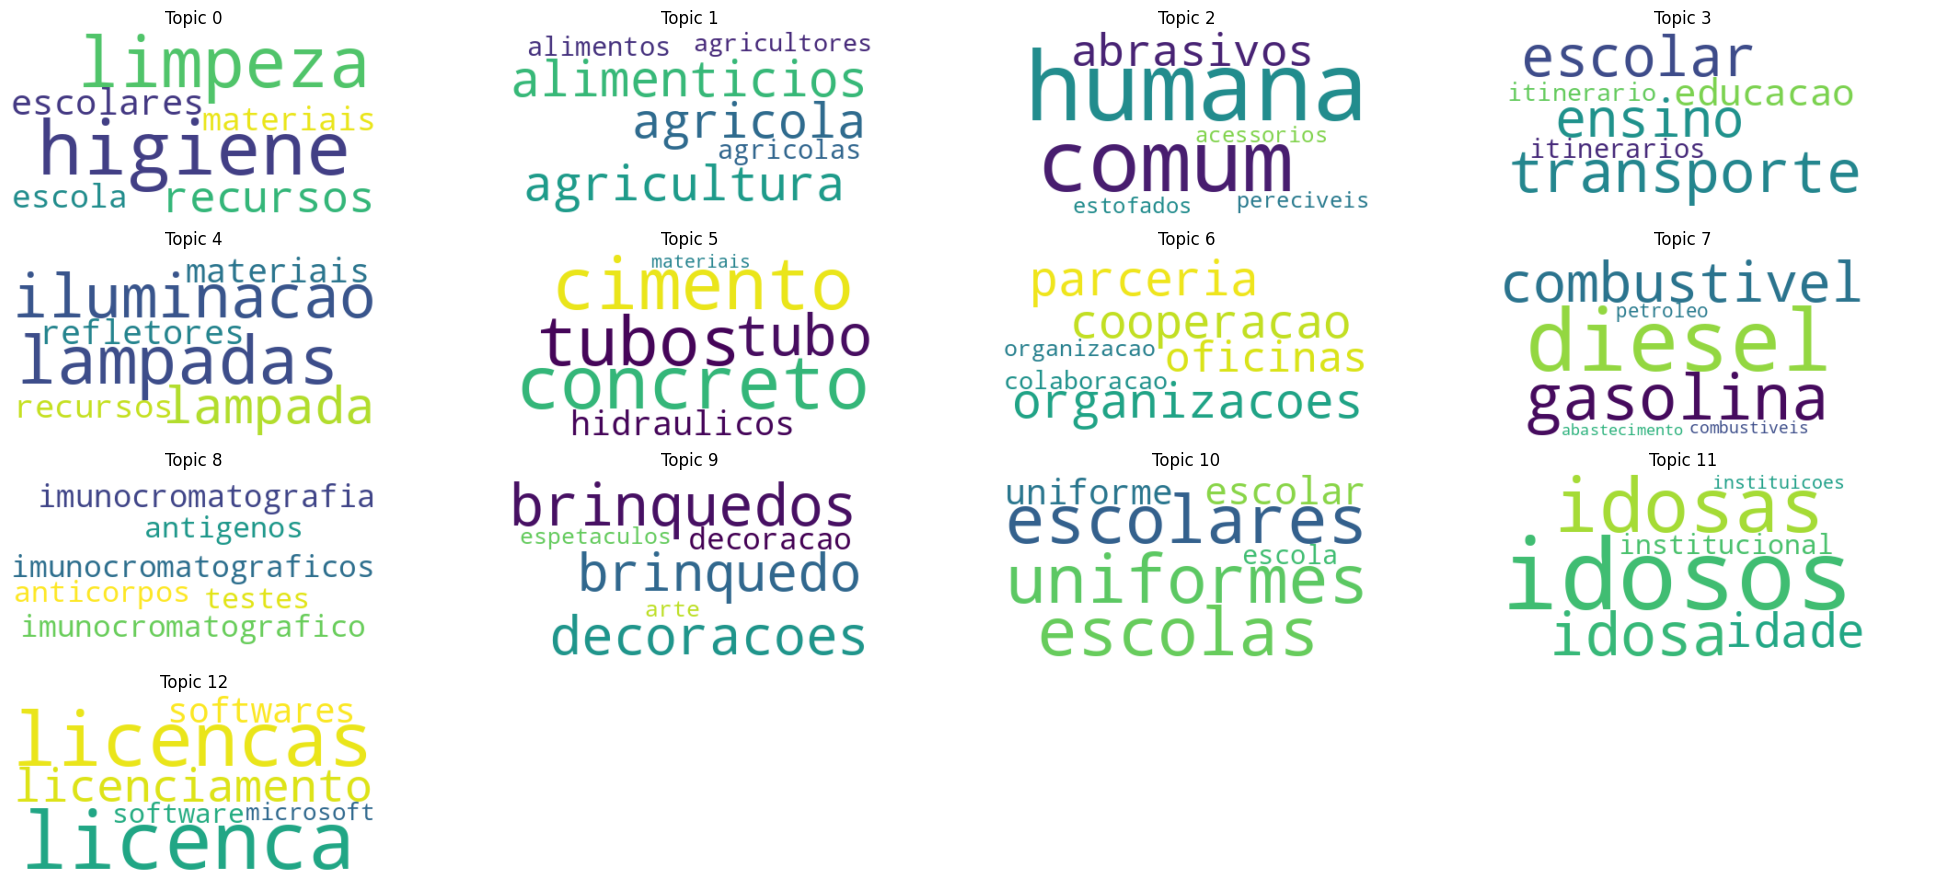

In [18]:
word_cloud_bertopic(topic_model, n_rows=4)

In [38]:
df_topic_model = topic_model.get_topic_freq()
df_topic_model = df_topic_model[df_topic_model["Topic"]!=-1]

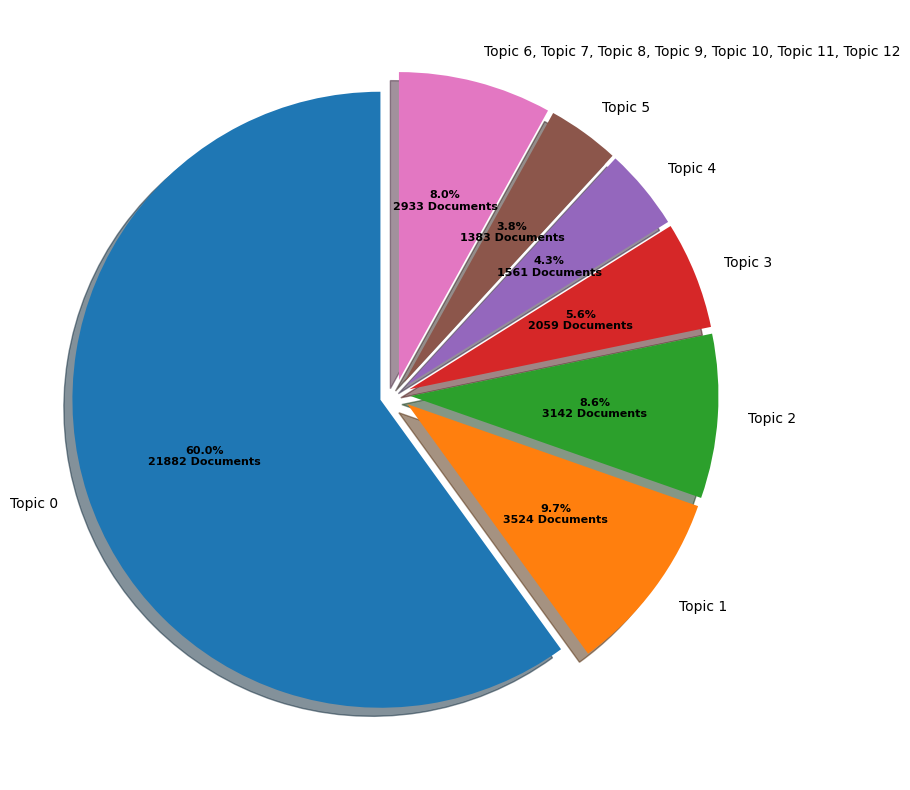

In [41]:
plot_lda_topic_dist(topic_model,
                    save_path="/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/images/bertopic/bertopic_dist_results_hdbscan_topn_6.pdf"
                    # , explode_factor=0.5
                    )

In [9]:
df_topic_model

,Topic,Count
1,0,19791
5,1,4245
4,2,3928
3,3,3823
6,4,3659
10,5,1883
2,6,1753
8,7,1196
7,8,790
12,9,407
